In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
columns=['Name','Sex','Ticket','Cabin','Embarked']

In [6]:
le=LabelEncoder()

In [7]:
for column in columns:
    data[column]=le.fit_transform(data[column])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 66.3 KB


In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [10]:
null=data.isna().mean()
data.fillna(null)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,0.198653,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,257.353842,0.477990,14.526497,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,20.125000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,38.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In [12]:
X=data.drop('Survived',axis=1)
y=data['Survived']
y_oh=to_categorical(y)

In [13]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,81,1,26.0,0,0,8,30.0000,60,0


In [14]:
y_oh

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [35]:
# X_train,X_test,y_train,y_test=train_test_split(X,y_oh,test_size=0.2,random_state=100)

In [36]:
model=Sequential()

In [55]:
model.add(Input(shape=(11,)))
# model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               6000      
                                                                 
 dense_17 (Dense)            (None, 100)               50100     
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 10)                510       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
 input_5 (InputLayer)        multiple                  0         
                                                                 
 dense_21 (Dense)            (None, 250)              

In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
H=model.fit(X,y,epochs=5,validation_split=0.2)

Epoch 1/5
23/23 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.6096 - val_loss: nan - val_accuracy: 0.6425
Epoch 2/5
23/23 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.6096 - val_loss: nan - val_accuracy: 0.6425
Epoch 3/5
23/23 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.6096 - val_loss: nan - val_accuracy: 0.6425
Epoch 4/5
23/23 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.6096 - val_loss: nan - val_accuracy: 0.6425
Epoch 5/5
23/23 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.6096 - val_loss: nan - val_accuracy: 0.6425


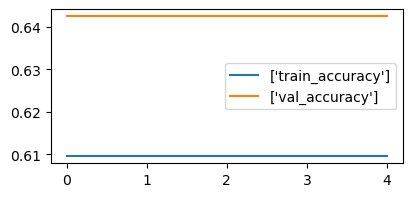

In [66]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(H.epoch,H.history['accuracy'],label=['train_accuracy'])
plt.plot(H.epoch,H.history['val_accuracy'],label=['val_accuracy'])
plt.legend()

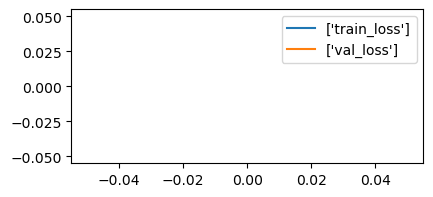

In [67]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(H.epoch,H.history['loss'],label=['train_loss'])
plt.plot(H.epoch,H.history['val_loss'],label=['val_loss'])
plt.legend()